In [2]:
using Distributions
using DataFrames
using Interact
using Gadfly

_________

## Exercise 5

You need to be agile calculating probabilities about the sampling average. Be sure that you are able to solve problems like:

__ a) Consider a random variable with a Normal distribution: __ $$X \cap N(\mu = 100, \sigma^2 = 144) $$

__Calculate the following probabilities: __

$$P(88 \leq X \leq 112)$$

Manually:

In [75]:
normal_5_1_values = rand(Normal(100, 12),1000000);

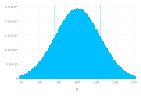

In [76]:
plot(x=normal_5_1_values, Geom.histogram, Coord.Cartesian(xmin=70,xmax=130), Geom.vline, xintercept=[88, 112])

Using the properties:

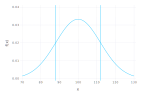

In [57]:
normal_5_1 = plot([x -> pdf(Normal(100,12), x)], 70, 130, xintercept=[88, 112], Geom.vline, Coord.Cartesian(xmin=70,xmax=130))

$$P(88 \leq \bar{X}_4 \leq 112)$$

Manually:

In [54]:
normal_5_2_values = Float64[]
for i in 1:1000000 push!(normal_5_2_values, mean(rand(Normal(100, 12),4))) end

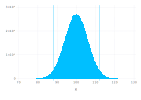

In [74]:
plot(x=normal_5_2_values, Geom.histogram, Coord.Cartesian(xmin=70,xmax=130), Geom.vline, xintercept=[88, 112])

Using the properties:

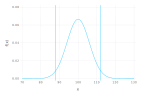

In [59]:
normal_5_2 = plot([x -> pdf(Normal(100,12/sqrt(4)), x)], 70, 130, xintercept=[88, 112], Geom.vline, Coord.Cartesian(xmin=70,xmax=130))

$$P(88 \leq \bar{X}_9 \leq 112)$$

Manually:

In [71]:
normal_5_3_values = Float64[]
for i in 1:1000000 push!(normal_5_3_values, mean(rand(Normal(100, 12),9))) end

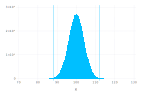

In [67]:
plot(x=normal_5_3_values, Geom.histogram, Coord.Cartesian(xmin=70,xmax=130), Geom.vline, xintercept=[88, 112])

Using the properties:

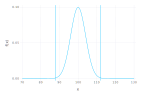

In [27]:
normal_5_3 = plot([x -> pdf(Normal(100,12/sqrt(9)), x)], 70, 130, xintercept=[88, 112], Geom.vline)

$$P(88 \leq \bar{X}_{16} \leq 112)$$

Manually:

In [68]:
normal_5_4_values = Float64[]
for i in 1:1000000 push!(normal_5_4_values, mean(rand(Normal(100, 12),16))) end

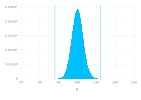

In [69]:
plot(x=normal_5_4_values, Geom.histogram, Coord.Cartesian(xmin=70,xmax=130), Geom.vline, xintercept=[88, 112])

Using the properties:

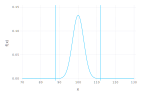

In [61]:
normal_5_4 = plot([x -> pdf(Normal(100,12/sqrt(16)), x)], 70, 130, xintercept=[88, 112], Geom.vline,  Coord.Cartesian(xmin=70,xmax=130))

_____________________

## Exercise 7

### Sweet potatoes: linear combination of independent Normal random variables

In the famous supermarket Sweet Potato, potatoes are packaged in small bags of about 1kg and larger bags of about 3kg. Notice that unlike rice grains, potatoes are not homogeneous. So, there is some variation in the exact weight of potato bags. Specifically, the weights of the smaller and bigger potato bags are random variables with Normal distributions with the following characteristics:

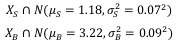

In [77]:
#manually
X_S_values = rand(Normal(1.18, 0.07), 1000000)
X_B_values = rand(Normal(3.22, 0.09), 1000000);
#using the properties
X_S = Normal(1.18, 0.07)
X_B = Normal(3.22, 0.09);

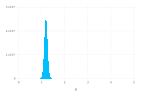

In [80]:
plot(x=X_S_values, Geom.histogram, Coord.Cartesian(xmin=0,xmax=5))

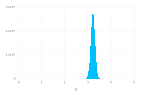

In [81]:
plot(x=X_B_values, Geom.histogram, Coord.Cartesian(xmin=0,xmax=5))

__a) The probability that the combined weight of three small bags is higher than the weight of one larger bag.__

_Manually:_

Let us define a new distribution: $Y = {X_S}_1+{X_S}_2+{X_S}_3$

In [98]:
X_S_1_values = rand(Normal(1.18, 0.07), 1000000)
X_S_2_values = rand(Normal(1.18, 0.07), 1000000)
X_S_3_values = rand(Normal(1.18, 0.07), 1000000);

In [99]:
Y_values = X_S_1_values+X_S_2_values+X_S_3_values;

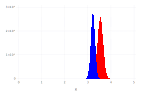

In [100]:
plot(layer(x=X_B_values, Geom.histogram, Theme(default_color=colorant"blue")), 
    layer(x=Y_values, Geom.histogram, Theme(default_color=colorant"red")), Coord.Cartesian(xmin=0,xmax=5))

_Using the properties:_

Let us define a new distribution: $Y = 3*B_S$

In [107]:
Y = Normal(1.18*3, sqrt(0.07^2*3))

Distributions.Normal{Float64}(μ=3.54, σ=0.12124355652982141)

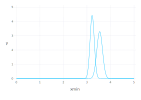

In [108]:
Y_dist = plot(layer([x -> pdf((Y), x)], 0, 5),layer([x -> pdf(Normal(3.22, 0.09), x)], 0, 5))

__ b) The probability that the weight of one small bag is higher than one-third of the weight of a larger bag. __

In [10]:
X_S_minus_third_X_B = Normal(1.18-3.22/3, sqrt(0.07^2+0.09^2*(1/3)^2))

Distributions.Normal{Float64}(μ=0.10666666666666647, σ=0.07615773105863909)

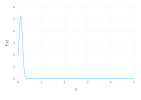

In [11]:
X_S_minus_third_X_B_dist = plot([x -> pdf((X_S_minus_third_X_B), x)], 0, 5)

___________

## Exercise 12

### Approximations to the (much too complicated!) Binomial

Let X be a random variable with a Binomial distribution: $X \cap Bin(100,0.1) $. Calculate $P(12 \leq X \leq 14)$ using:

In [12]:
function discrete_sample_pdf(array_of_values)
    pdf_df = DataFrame(x_values = Int64[], y_values = Float64[])
    for x_value in sort(unique(array_of_values))
        counter = 0
        for value in array_of_values
            if value == x_value
                counter += 1
            end
        end
        push!(pdf_df, [x_value, counter/length(array_of_values)])
    end
    return pdf_df
end

discrete_sample_pdf (generic function with 1 method)

__ a) The exact distribution __

In [17]:
binomial_12 = discrete_sample_pdf(rand(Binomial(100,.1),100000))

,x_values,y_values
1,0,2.0e-5
2,1,0.00033
3,2,0.00152
4,3,0.00556
5,4,0.0155
6,5,0.03488
7,6,0.05869
8,7,0.08845
9,8,0.11406
10,9,0.13223


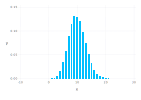

In [18]:
binomial_12_pdf = plot(x=binomial_12[:x_values], y=binomial_12[:y_values], Geom.bar, Theme(bar_spacing=1mm))

__ b) An approximation to the Poisson distribution __

In [19]:
poisson_12 = discrete_sample_pdf(rand(Poisson(100*.1),100000))

,x_values,y_values
1,0,4.0e-5
2,1,0.00034
3,2,0.0021
4,3,0.00756
5,4,0.01812
6,5,0.03921
7,6,0.06429
8,7,0.08925
9,8,0.11266
10,9,0.12397


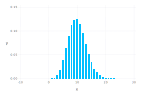

In [20]:
poisson_12_pdf = plot(x=poisson_12[:x_values], y=poisson_12[:y_values], Geom.bar, Theme(bar_spacing=1mm))

__c) An approximation to the Normal distribution__

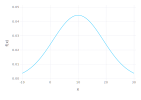

In [22]:
normal_12_pdf = plot([x -> pdf(Normal(100*.1,100*.1(1-.1)), x)], -10, 30)

In [134]:
normal_XX = Float64[]
for i in 1:1000000
    a = rand(Normal(40, 2),1)
    result = a[1]^2
    push!(normal_XX, result)
end

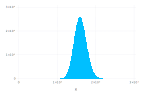

In [137]:
plot(x=normal_XX, Geom.histogram)

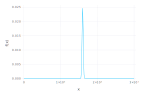

In [138]:
plot([x -> pdf(Normal(40*40,2^4), x)], 0, 3000)